<div align="center">
    <h2> TERCER RECURSO
    <h5>El movimiento del telescopio espacial James Webb
    <h5>Temática: aplicación de la teoría del CRTBP
</div>

<blockquote>
Universidad de Antioquia. <br>
Facultad de Ciencias Exactas y Naturales. <br>
<b>Advertencia</b>: recursos creados como parte del desarrollo del curso mecánica celeste (0311602) del pregrado de astronomía de la Universidad de Antioquia, bajo la dirección del profesor Jorge Zuluaga.
</blockquote>

## Paquetes y librerias necesarias para el reto

In [1]:
!python -m pip install astroquery &> /dev/null
!python -m pip install rebound &> /dev/null

!wget https://github.com/seap-udea/MecanicaCeleste-Zuluaga/raw/master/pymcel.tgz &> /dev/null
!tar zxvf pymcel.tgz &> /dev/null
!python -m pip install spiceypy  &> /dev/null

In [2]:
from astroquery.jplhorizons import Horizons
from astropy.time import Time
import astropy.units as u
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pymcel.export import *
import seaborn as sns
sns.set()

## Puntos
Estudiaremos en este reto la aplicación de la teoría del CRTBP al movimiento del telescopio espacial James Webb.

Para ello:

1. Descargue usando astroquery las posiciones respecto al sol entre el momento en el que alcanzo su órbita final y 2 años después cada día.  Haga un gráfico en 3D exagerando la escala del eje z de la órbita del telescopio en el sistema de referencia del SSB.

2. Descargue la misma información pero para la Tierra. Calcule en cada instante de tiempo la velocidad angular instantánea de la Tierra en cada momento del intervalo de tiempo escogido.  La velocidad angular instantánea es igual a la componente de la velocidad de la Tierra perpendicular a su distancia, dividido por la distancia en ese instante de tiempo.  Ese será nuestro ω(t).


In [3]:
#--------------------------------------------
#-- Fecha en la que el JWST alzanzó L2   ----
#-----------   2022-02-24    ----------------

#Unidades
UA=1.496e+11 #metros
UA_d=1.496e+11/86400 #metros/segundos

In [4]:
tierra=Horizons(id="399",location="@0",epochs={"start":"2022-02-24","stop":"2024-02-24","step":"1d"}).vectors()
JWST=Horizons(id="-170",location="@0",epochs={"start":"2022-02-24","stop":"2024-02-24","step":"1d"}).vectors()

P=['x','y','z']  
V=['vx','vy','vz']

r_tierra= tierra[P]
r_JWST=JWST[P]

v_tierra= tierra[V]
v_JWST=JWST[V]

T=r_tierra.to_pandas()
JW=r_JWST.to_pandas()




In [5]:
%matplotlib inline
plt.style.use('bmh')


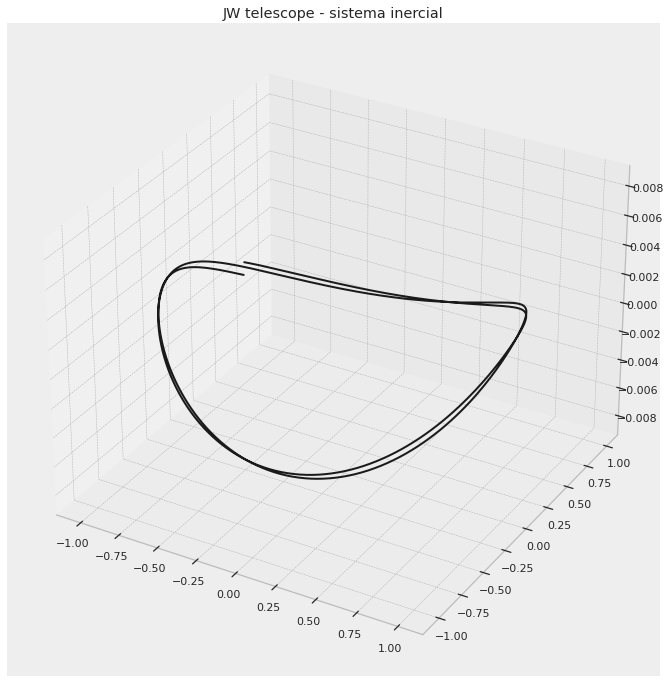

In [32]:
#Gráfico
fig = plt.figure( figsize=(14,12))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = JW['z']
xline = JW['x']
yline = JW['y']

ax.plot3D(xline, yline, zline, '-k');
ax.set_zlim3d(-0.009, 0.009);
ax.set_title('JW telescope - sistema inercial');

In [7]:
#posiciones 
r_T=r_tierra.to_pandas()
r_JW=r_JWST.to_pandas()

#velocidades 
v_T = v_tierra.to_pandas()
v_JW =v_JWST.to_pandas()

#almaceno como vector (TIERRA)
r_T['r']=r_T.apply(lambda r: tuple(r), axis=1).apply(np.array)
v_T ['v']=v_T .apply(lambda r: tuple(r), axis=1).apply(np.array)


#almaceno como vector  (JW)
r_JW['r']=r_JW.apply(lambda r: tuple(r), axis=1).apply(np.array)
v_JW['v']=v_JW.apply(lambda r: tuple(r), axis=1).apply(np.array)

#guardo nuevo data frame 
data=pd.concat([r_T, v_T ], axis=1)

#guardo nuevo data frame  (JW)
data2=pd.concat([r_JW, v_JW ], axis=1)

#función magnitud un vector 
def v_mag(r):
  mag_v=np.linalg.norm(r)
  return mag_v

#magnitud de r
data['mag_r'] = data.apply(lambda x: v_mag(x['r']), axis=1).apply(np.array)

#magnitud de v
data['mag_v'] = data.apply(lambda x: v_mag(x['v']), axis=1).apply(np.array)

#magnitud de r
data2['mag_r'] = data.apply(lambda x: v_mag(x['r']), axis=1).apply(np.array)

#magnitud de v
data2['mag_v'] = data.apply(lambda x: v_mag(x['v']), axis=1).apply(np.array)

In [8]:
#velocidad angular instantanea de la tierra
data['w'] = data.apply(lambda x: np.arctan2(x['y'],x['x']), axis=1).apply(np.array) 
data['w']

0      2.707074
1      2.724484
2      2.741888
3      2.759285
4      2.776675
         ...   
726    2.633390
727    2.650891
728    2.668382
729    2.685863
730    2.703334
Name: w, Length: 731, dtype: float64

## Punto 3.
Calcule la matriz de rotación entre el sistema de referencia inercial y un sistema de referencia rotante que acompaña la Tierra en cada uno de los instantes de tiempo de los que bajos los datos.

In [9]:
data['w(t)_x'] =0
data['w(t)_y'] =0
data['w(t)_vec']=data.apply(lambda r: np.array([r['w(t)_x'],r['w(t)_y'],r['w']]), axis=1).apply(np.array)

omega0=data['w']
omega_vec=data['w(t)_vec']

In [10]:
data['w(t)_vec']

0       [0.0, 0.0, 2.707073632892272]
1       [0.0, 0.0, 2.724484356368757]
2      [0.0, 0.0, 2.7418883575337434]
3      [0.0, 0.0, 2.7592854599435834]
4      [0.0, 0.0, 2.7766754065792214]
                    ...              
726     [0.0, 0.0, 2.633389621992918]
727    [0.0, 0.0, 2.6508907132277386]
728     [0.0, 0.0, 2.668381656315317]
729    [0.0, 0.0, 2.6858625910067326]
730     [0.0, 0.0, 2.703333672002612]
Name: w(t)_vec, Length: 731, dtype: object

In [11]:
#Extraemos las posiciones del vector solución
rs_ine=data['r']
vs_ine=data['v']

Nt=731
ts=np.linspace(0,10,Nt)

#Aquí realizamos las rotaciones
MXV=dict()
for i in range(Nt):
    
    #Matriz de rotación
    from spiceypy import rotate
    R=rotate(omega0[i],3)
    
    #Rotación del vector posición y el vector velocidad
    from spiceypy import mxv
    MXV['%d' % i]= mxv(R,rs_ine[i]) 
R

array([[-0.90549186,  0.42436363,  0.        ],
       [-0.42436363, -0.90549186,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

### Punto 4. 
A partir de los datos en 1 y los valores de la velocidad angular en 2 y la matriz de rotación en 3 calcule la posición y velocidad del telescopio en el sistema rotante Sol-Tierra.  Haga un gráfico de la órbita del JWST en el sistema rotante.

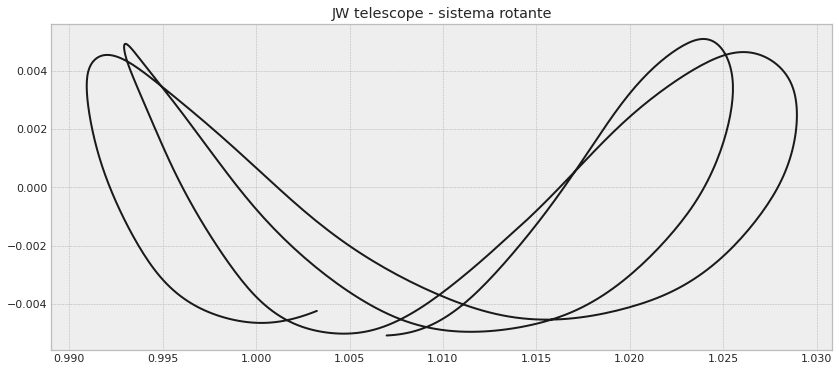

In [12]:
#Extraemos las posiciones del vector solución
rs_ine=data2['r']
vs_ine=data2['v']

Nt=731
ts=np.linspace(0,10,Nt)

#Aquí realizamos las rotaciones
MXV=dict()
MXV_v=dict()
for i in range(Nt-1):
    
    #Matriz de rotación
    from spiceypy import rotate
    R=rotate(omega0[i],3)
    
    #Rotación del vector posición y el vector velocidad
    from spiceypy import mxv,vcrss
    MXV['%d' % i]= mxv(R,rs_ine[i])
    MXV_v['%d' % i]=(vs_ine[i+1]-vs_ine[i])/(ts[i+1]-ts[i])

ROT_r=pd.DataFrame.from_dict(MXV).T
ROT_v_teo=pd.DataFrame.from_dict(MXV_v).T
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14,6));
ax=fig.gca()
ax.plot(ROT_r[0],ROT_r[1],'k-');
ax.set_title('JW telescope - sistema rotante');

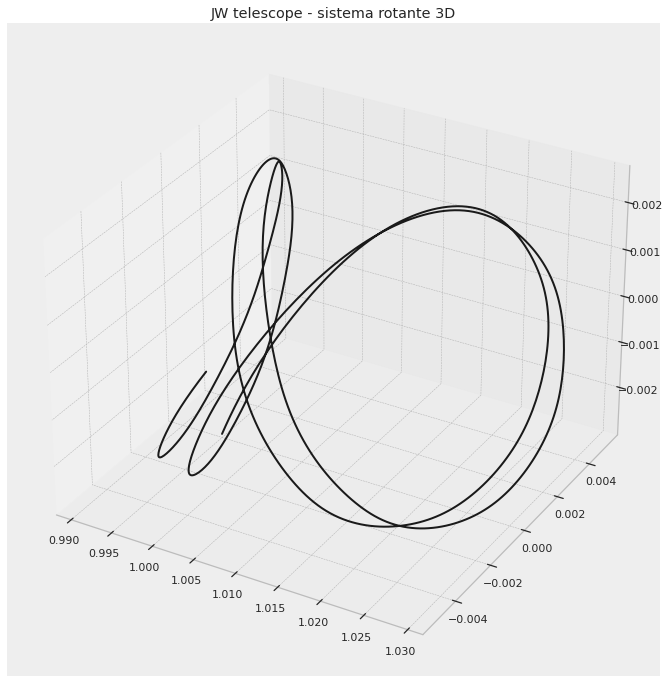

In [31]:
#Gráfico
fig_ = plt.figure(figsize=(14,12))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = ROT_r[2]
xdata = ROT_r[0]
ydata = ROT_r[1]
ax.plot3D(xdata, ydata, zdata, 'k-');
ax.set_title('JW telescope - sistema rotante 3D');

## Punto 5. 
Calcule para cada momentos del tiempo el valor de la constante de Jacobi y verifique si es aproximadamente constante

In [14]:
ROT_r

,0,1,2
0,1.006986,-0.005066,-0.000527
1,1.007204,-0.005058,-0.000427
2,1.007423,-0.005046,-0.000327
3,1.007642,-0.005029,-0.000225
4,1.007861,-0.005007,-0.000124
...,...,...,...
725,1.002118,-0.004471,-0.000079
726,1.002397,-0.004419,0.000012
727,1.002678,-0.004361,0.000103
728,1.002963,-0.004296,0.000195


In [15]:
ROT_v_teo

,0,1,2
0,0.020084,-0.009649,0.000060
1,0.020246,-0.009296,0.000051
2,0.020401,-0.008940,0.000042
3,0.020550,-0.008582,0.000033
4,0.020694,-0.008221,0.000023
...,...,...,...
725,0.019145,-0.011519,0.000021
726,0.019345,-0.011183,0.000013
727,0.019540,-0.010842,0.000004
728,0.019728,-0.010498,-0.000004


In [16]:
ROT_v_teo['v']=ROT_v_teo.apply(lambda r: tuple(r), axis=1).apply(np.array)
ROT_r['r']=ROT_r.apply(lambda r: tuple(r), axis=1).apply(np.array)

In [17]:
ROT_v_teo['v']

0      [0.020084497955438353, -0.009648792566043209, ...
1      [0.02024580163654548, -0.009295825859198328, 5...
2      [0.02040104904563853, -0.00893991585990538, 4....
3      [0.02055041985144315, -0.008581828314684539, 3...
4      [0.020693834100187346, -0.008220873538186044, ...
                             ...                        
725    [0.0191445189246681, -0.011518926556433627, 2....
726    [0.01934511805335166, -0.011182527219258508, 1...
727    [0.019539738218251824, -0.010842425999752606, ...
728    [0.019728271177642673, -0.010498466074080974, ...
729    [0.01991074858355204, -0.010150535627424823, -...
Name: v, Length: 730, dtype: object

In [18]:
#magnitud de v
ROT_v_teo['mag_v'] =ROT_v_teo.apply(lambda x: v_mag(x['v']), axis=1).apply(np.array)
ROT_r['mag_r'] =ROT_r.apply(lambda x: v_mag(x['r']), axis=1).apply(np.array)


In [19]:
ROT_v_teo

,0,1,2,v,mag_v
0,0.020084,-0.009649,0.000060,"[0.020084497955438353, -0.009648792566043209, ...",0.022282
1,0.020246,-0.009296,0.000051,"[0.02024580163654548, -0.009295825859198328, 5...",0.022278
2,0.020401,-0.008940,0.000042,"[0.02040104904563853, -0.00893991585990538, 4....",0.022274
3,0.020550,-0.008582,0.000033,"[0.02055041985144315, -0.008581828314684539, 3...",0.022270
4,0.020694,-0.008221,0.000023,"[0.020693834100187346, -0.008220873538186044, ...",0.022267
...,...,...,...,...,...
725,0.019145,-0.011519,0.000021,"[0.0191445189246681, -0.011518926556433627, 2....",0.022343
726,0.019345,-0.011183,0.000013,"[0.01934511805335166, -0.011182527219258508, 1...",0.022345
727,0.019540,-0.010842,0.000004,"[0.019539738218251824, -0.010842425999752606, ...",0.022346
728,0.019728,-0.010498,-0.000004,"[0.019728271177642673, -0.010498466074080974, ...",0.022348


In [20]:
len(ROT_v_teo)

730

In [21]:
def constante_jacobi(alfa,r,vel):
    from numpy import array
    
    #Valor de x, y, z
    x=vel[0]
    y=vel[1]
    z=vel[2]
    
    #Rapidez
    from numpy.linalg import norm
    v=r['mag_v']
    
    #Posiciones relativas
    from numpy import sqrt
    r1=sqrt((x+alfa)**2+y**2+z**2)
    r2=sqrt((x-1+alfa)**2+y**2+z**2)
    
    #Valor de la constante
    CJ=2*(1-alfa)/r1+2*alfa/r2+(x**2+y**2)-v**2
    return CJ

m2=5.972e24 #kg
m1=1.989e30 #kg

alfa=m2/(m1+m2)
alfa

3.00250481098103e-06

In [22]:
Cj=constante_jacobi(alfa,ROT_v_teo,ROT_r)
Cj

0      3.000332
1      3.000328
2      3.000325
3      3.000323
4      3.000321
         ...   
725    3.000716
726    3.000700
727    3.000683
728    3.000664
729    3.000645
Length: 730, dtype: float64

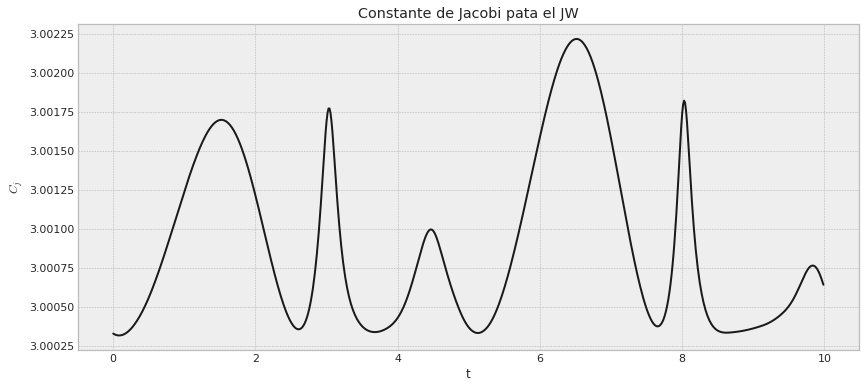

In [23]:
plt.figure(figsize=(14,6))
plt.plot(ts[:730], Cj, 'k')
plt.xlabel('t')
plt.ylabel('$C_j$')
plt.title('Constante de Jacobi pata el JW');

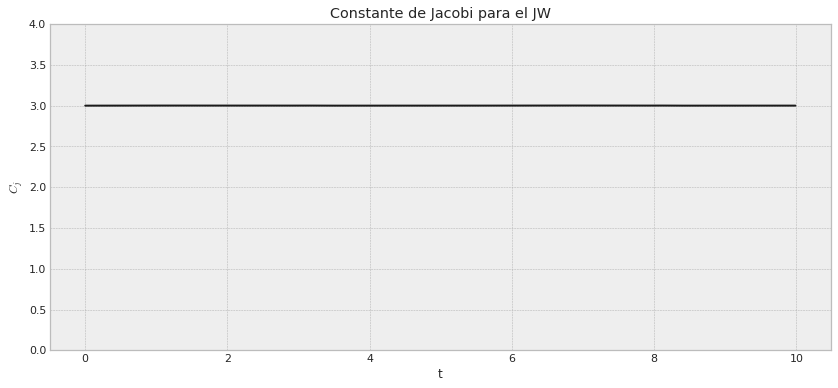

In [33]:
#aJjustando los ejes se obtiene
plt.figure(figsize=(14,6))
plt.plot(ts[:730], Cj, 'k')
plt.title('Constante de Jacobi para el JW');
plt.xlabel('t')
plt.ylabel('$C_j$')
plt.ylim(0,4);



Queda verificado que el valor de $C_j$ es aproximadamente constante